<a href="https://colab.research.google.com/github/NeelNakrani/Classification-example/blob/main/Classification_Glioma_Grading_Clinical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fetch Dataset

In [69]:
!pip install ucimlrepo

In [70]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
glioma_grading_clinical_and_mutation_features = fetch_ucirepo(id=759)

# data (as pandas dataframes)
X = glioma_grading_clinical_and_mutation_features.data.features
y = glioma_grading_clinical_and_mutation_features.data.targets

# metadata
print(glioma_grading_clinical_and_mutation_features.metadata)

# variable information
print(glioma_grading_clinical_and_mutation_features.variables)

{'uci_id': 759, 'name': 'Glioma Grading Clinical and Mutation Features', 'repository_url': 'https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/759/data.csv', 'abstract': 'Gliomas are the most common primary tumors of the brain. They can be graded as LGG (Lower-Grade Glioma) or GBM (Glioblastoma Multiforme) depending on the histological/imaging criteria. Clinical and molecular/mutation factors are also very crucial for the grading process. Molecular tests are expensive to help accurately diagnose glioma patients.    In this dataset, the most frequently mutated 20 genes and 3 clinical features are considered from TCGA-LGG and TCGA-GBM brain glioma projects.  The prediction task is to determine whether a patient is LGG or GBM with a given clinical and molecular/mutation features. The main objective is to find the optimal subset of mutation genes and clinical features for the glioma grading 

## Dataset

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [72]:
X.head()

,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,51.30,white,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,38.72,white,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,35.17,white,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,32.78,white,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,31.51,white,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            839 non-null    int64  
 1   Age_at_diagnosis  839 non-null    float64
 2   Race              839 non-null    object 
 3   IDH1              839 non-null    int64  
 4   TP53              839 non-null    int64  
 5   ATRX              839 non-null    int64  
 6   PTEN              839 non-null    int64  
 7   EGFR              839 non-null    int64  
 8   CIC               839 non-null    int64  
 9   MUC16             839 non-null    int64  
 10  PIK3CA            839 non-null    int64  
 11  NF1               839 non-null    int64  
 12  PIK3R1            839 non-null    int64  
 13  FUBP1             839 non-null    int64  
 14  RB1               839 non-null    int64  
 15  NOTCH1            839 non-null    int64  
 16  BCOR              839 non-null    int64  
 1

In [74]:
y.head()

,Grade
0,0
1,0
2,0
3,0
4,0


In [75]:
y.value_counts()

Grade
0        487
1        352
dtype: int64

In [76]:
X.drop('Race', axis=1, inplace=True)

<ipython-input-76-d3d720644213>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Race', axis=1, inplace=True)


In [77]:
X.shape

(839, 22)

In [78]:
y.shape

(839, 1)

In [79]:
cols = X.columns

In [80]:
dataset = pd.concat([X, y], axis=1)

In [81]:
dataset.head()

,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Grade
0,0,51.30,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,38.72,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,35.17,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,32.78,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,31.51,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


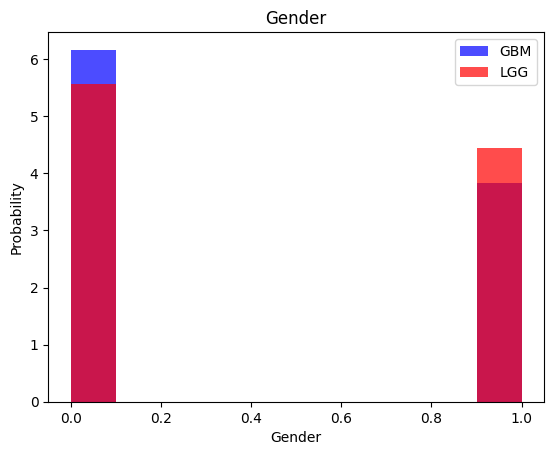

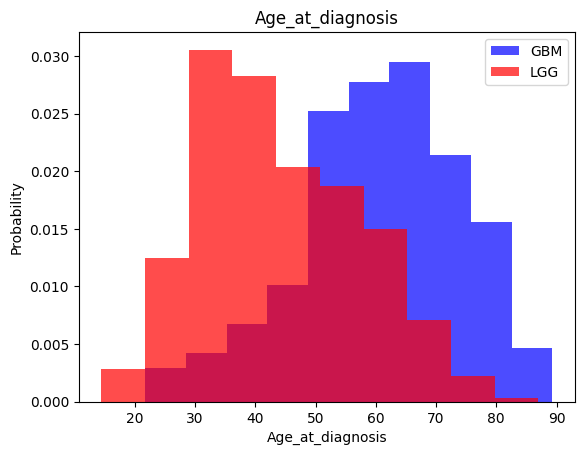

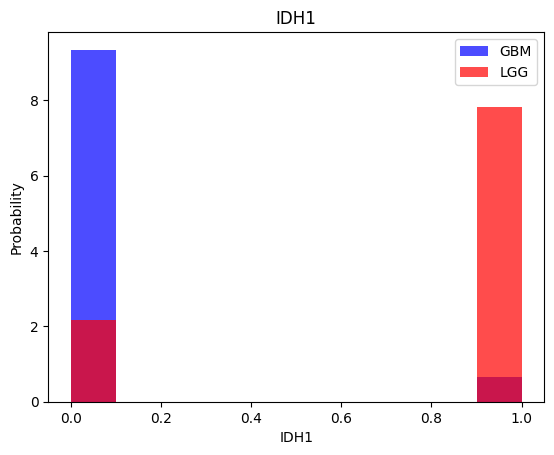

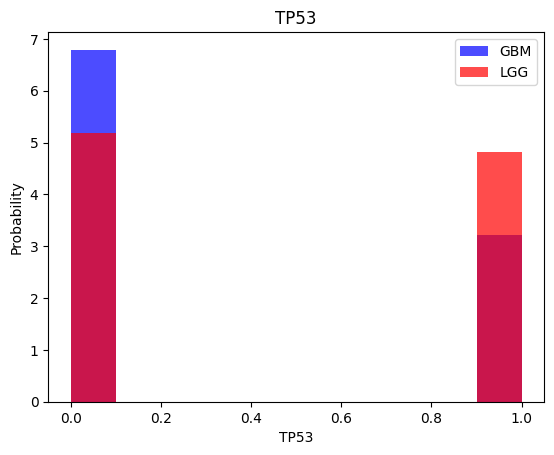

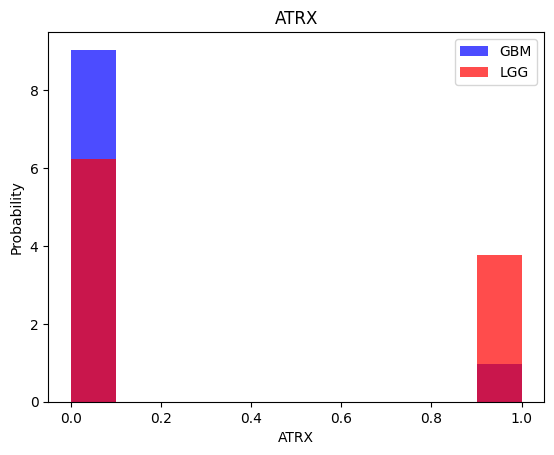

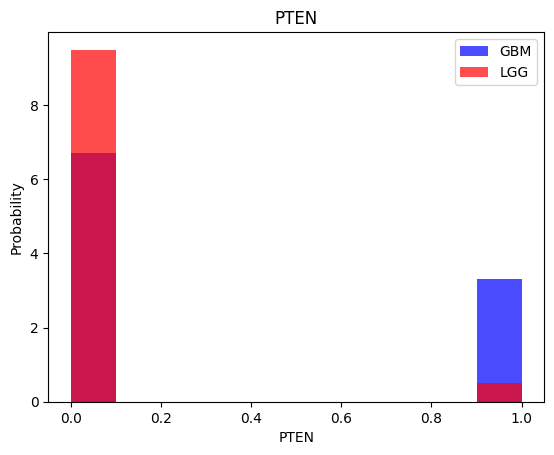

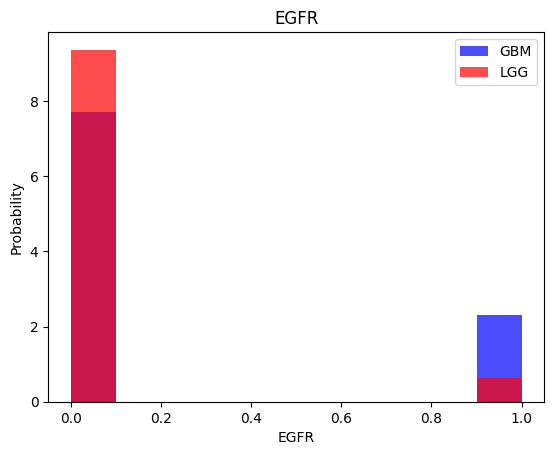

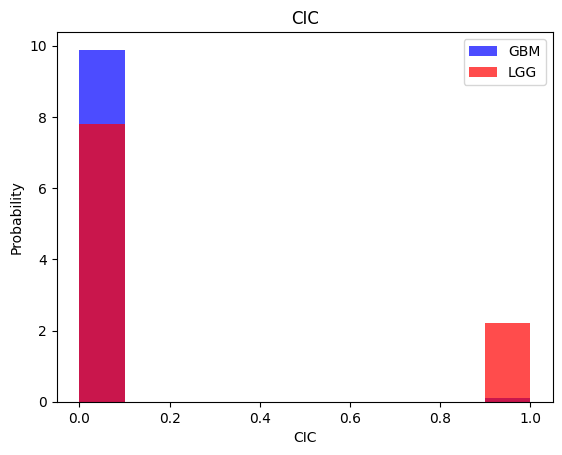

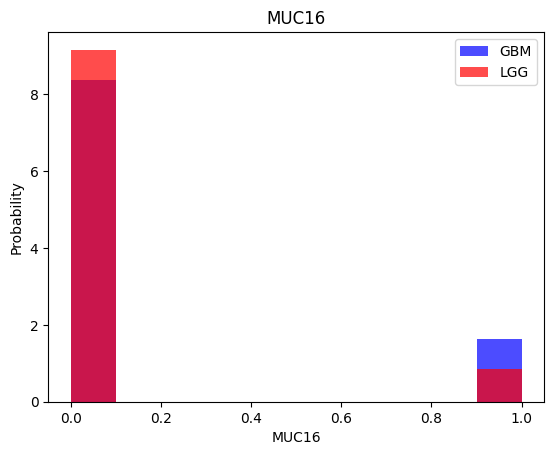

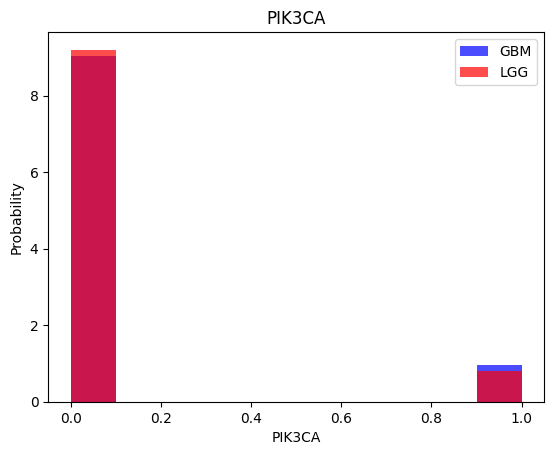

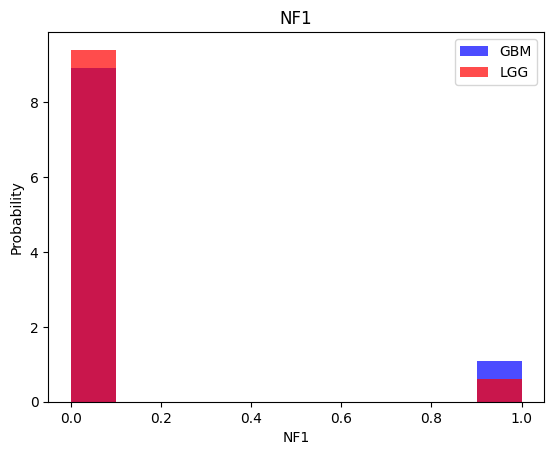

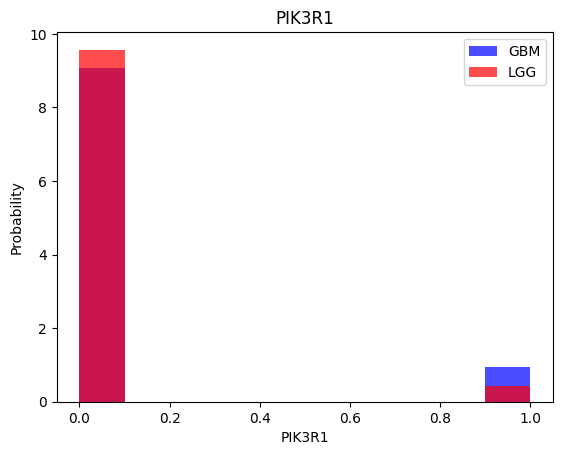

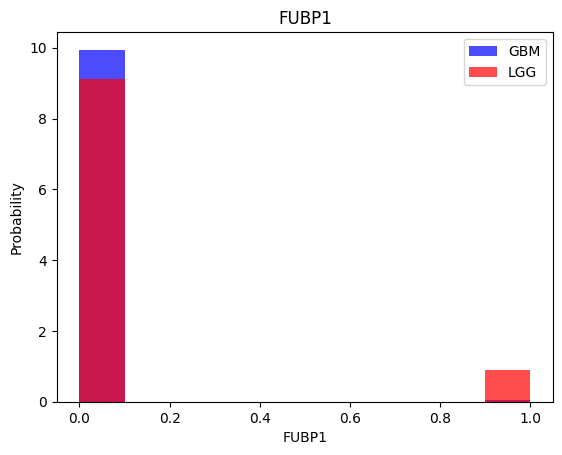

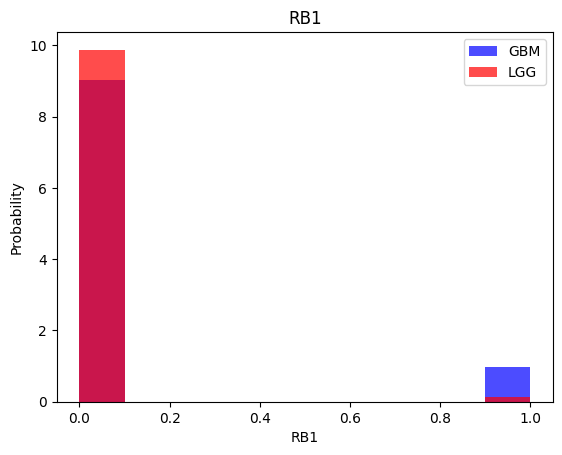

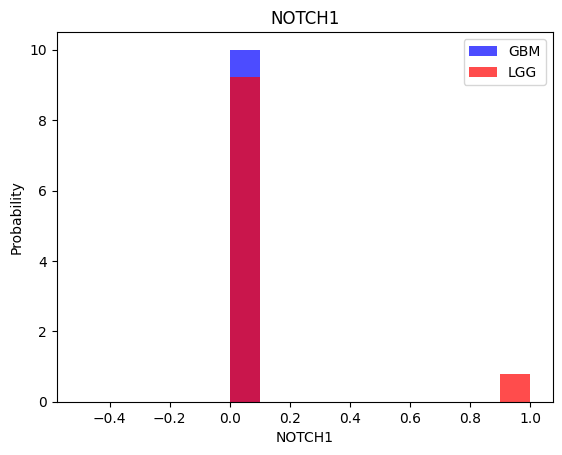

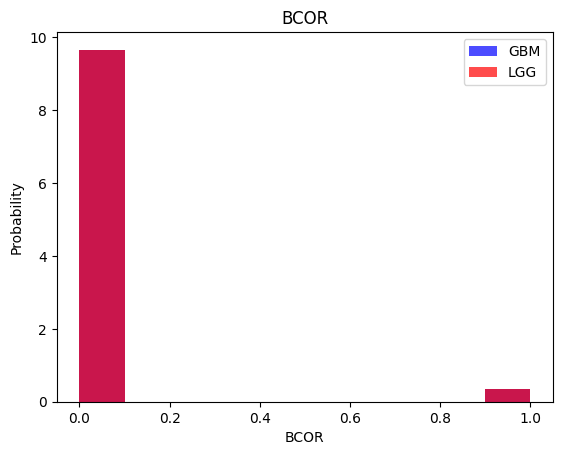

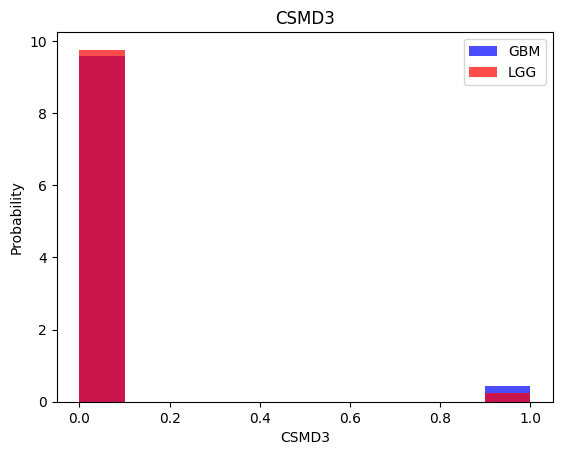

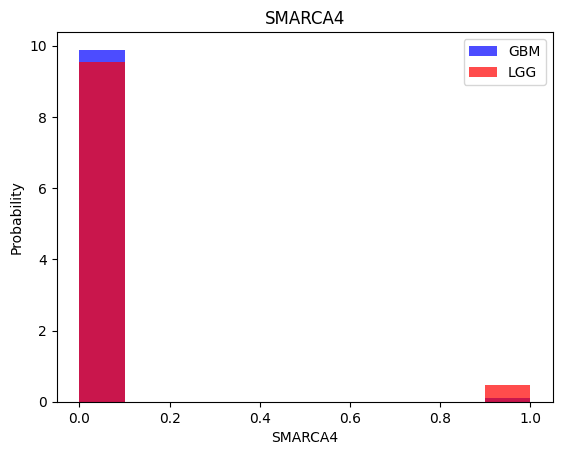

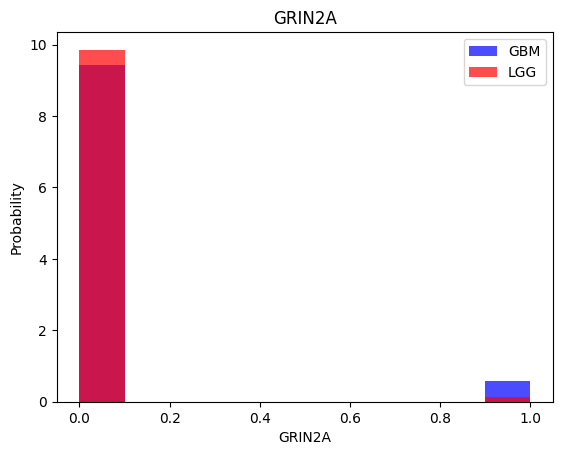

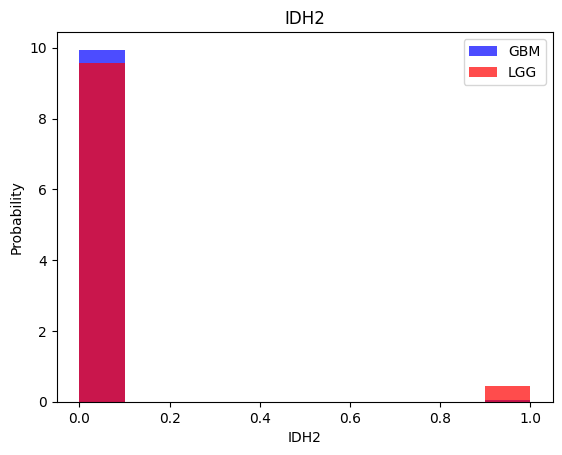

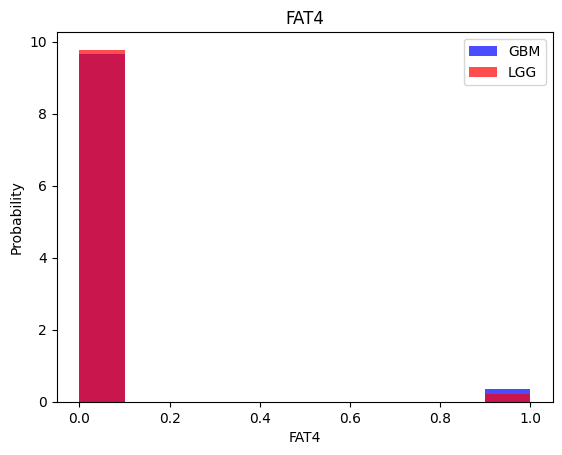

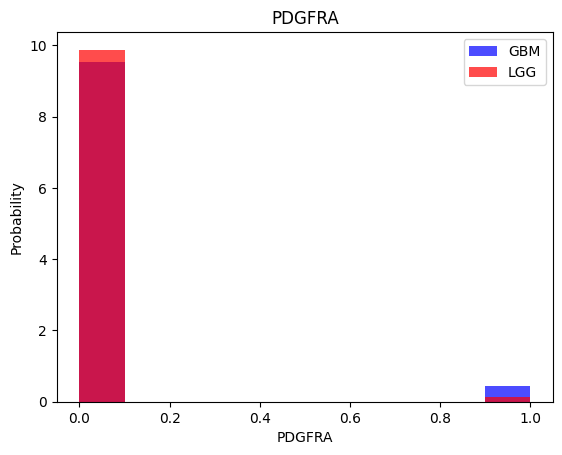

In [82]:
for label in cols:
  plt.hist(dataset[dataset['Grade']==1][label], color='blue', label='GBM', alpha=0.7, density=True)
  plt.hist(dataset[dataset['Grade']==0][label], color='red', label='LGG', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

## Train, Validation and Test

In [83]:
train, valid, test = np.split(dataset.sample(frac=1), [int(0.6*len(dataset)), int(0.8*len(dataset))])

## Data scalling and oversampliing

In [84]:
dataset['Grade'].value_counts()

0    487
1    352
Name: Grade, dtype: int64

In [85]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [86]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [87]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

## KNN Classification

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [89]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [90]:
y_pred = knn_model.predict(X_test)

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        90
           1       0.82      0.87      0.84        78

    accuracy                           0.85       168
   macro avg       0.85      0.85      0.85       168
weighted avg       0.85      0.85      0.85       168



## Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB

In [93]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [94]:
y_pred = nb_model.predict(X_test)

In [95]:
print(classification_report(y_test, y_pred, zero_division=True))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        90
           1       1.00      0.00      0.00        78

    accuracy                           0.54       168
   macro avg       0.77      0.50      0.35       168
weighted avg       0.75      0.54      0.37       168

